# Titanic ML Competition - Notebook

Library import

In [1]:
#!pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [3]:
# First we read the train and test data set
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- First we take a look on Age | Cabin | Embarked. This considering the null values

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

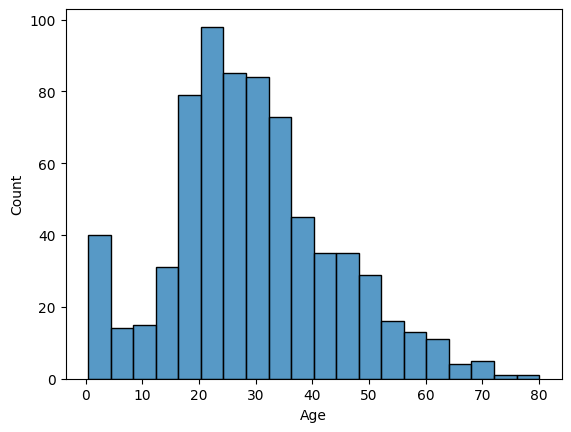

In [6]:
sns.histplot(train_df, x = 'Age')

In [7]:
train_df[train_df.Age != train_df.Age].shape[0] / train_df.shape[0]

0.19865319865319866

20% of null values for age is too much data, we shall impute. For this we will use the median value by sex and pclass

In [8]:
train_df[train_df.Age != train_df.Age]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [9]:
grouped_medians = train_df.groupby(['Pclass', 'Sex'])['Age'].median()

def impute_age(row):
    if pd.isna(row['Age']): # If age is NaN, then the median is added
        row['Age'] = grouped_medians[row['Pclass'],row['Sex']]
    return row
    
train_df = train_df.apply(impute_age, axis = 1)

In [10]:
train_df[train_df.Cabin != train_df.Cabin].shape[0] / train_df.shape[0]

0.7710437710437711

77% is too much null data, so Cabin is dropped.

In [11]:
train_df = train_df.drop(columns=['Cabin'])

<Axes: >

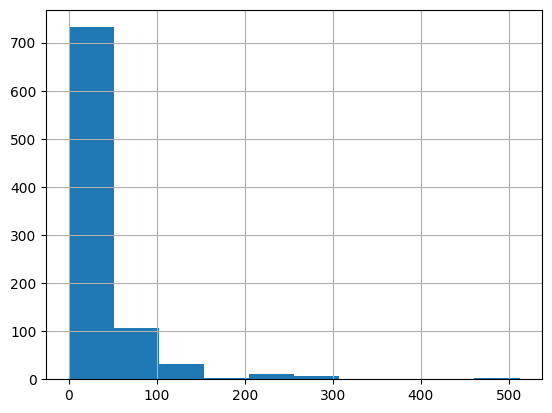

In [12]:
train_df.Fare.hist()

In [13]:
train_df[(train_df.Fare > 65) & (train_df.Fare < 85)]['Embarked'].value_counts()

Embarked
S    29
C    19
Name: count, dtype: int64

In [14]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='Fare'>

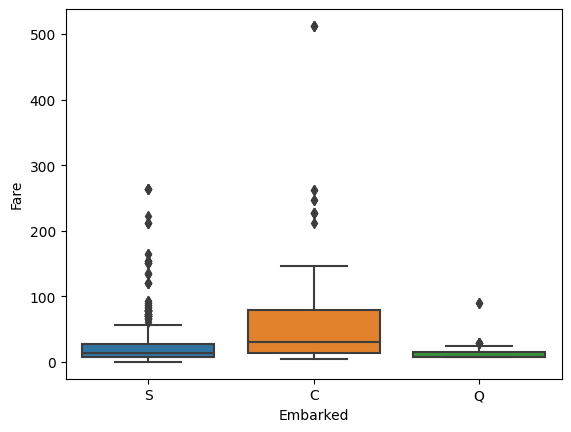

In [15]:
sns.boxplot(x="Embarked", y="Fare",
            data=train_df)

After seeing the distribution we can impute the mode in the missing values of Embarked.

---

### Correlation

In [16]:
train_df.select_dtypes(include='number').corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039033,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500
Age,0.039033,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.057527,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000


No high correlation with Survided

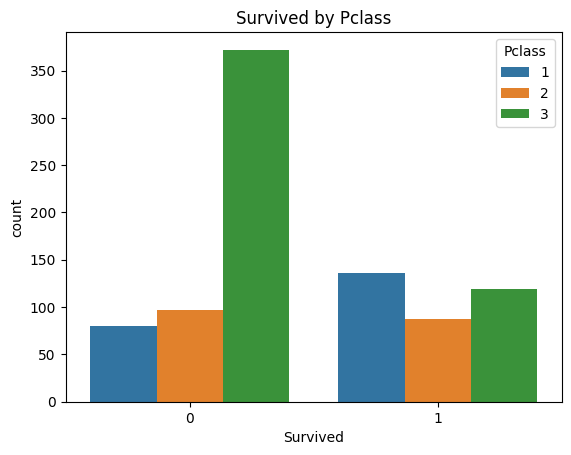

In [17]:
sns.countplot(
    data=train_df, 
    x="Survived", 
    hue="Pclass"
)
plt.title('Survived by Pclass')
plt.show()

There's a tendency due to the larger amount on Pclass 3

In [18]:
# Name is dropped 
train_df.drop('Name', axis = 1, inplace = True)

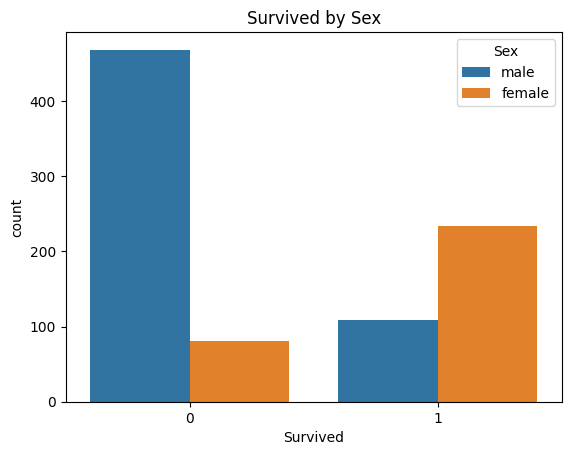

In [19]:
sns.countplot(
    data=train_df, 
    x="Survived", 
    hue="Sex"
)
plt.title('Survived by Sex')
plt.show()

Females tend to survive more

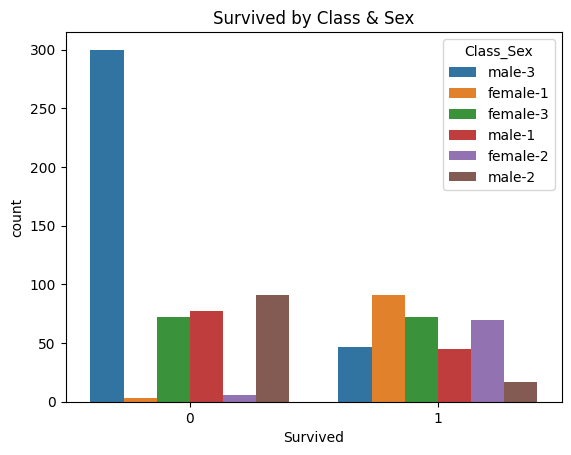

In [20]:
# Lets see Sex + Pclass
train_df['Class_Sex'] = train_df['Sex'] + "-" + train_df['Pclass'].astype(str)

sns.countplot(
    data=train_df, 
    x="Survived", 
    hue="Class_Sex"
)
plt.title('Survived by Class & Sex')
plt.show()

<Axes: >

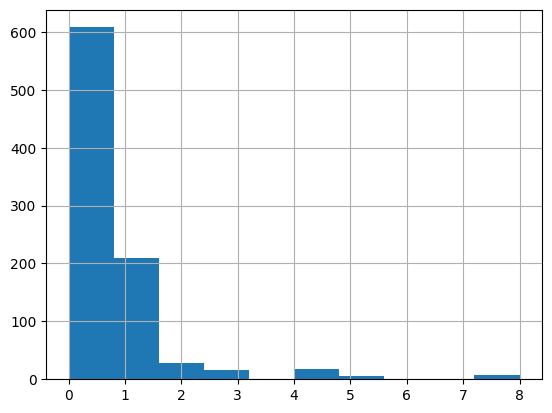

In [21]:
train_df['SibSp'].hist()

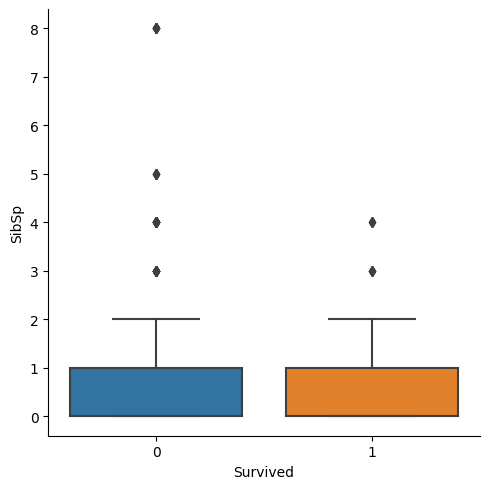

In [22]:
sns.catplot(
    data = train_df,
    x = 'Survived',
    y = 'SibSp',
    kind = 'box'
)

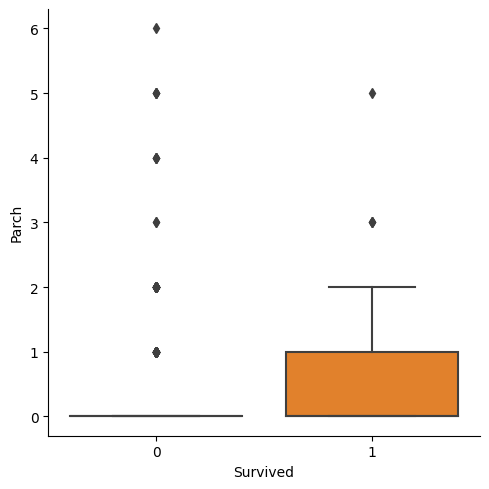

In [23]:
sns.catplot(
    data = train_df,
    x = 'Survived',
    y = 'Parch',
    kind = 'box'
)

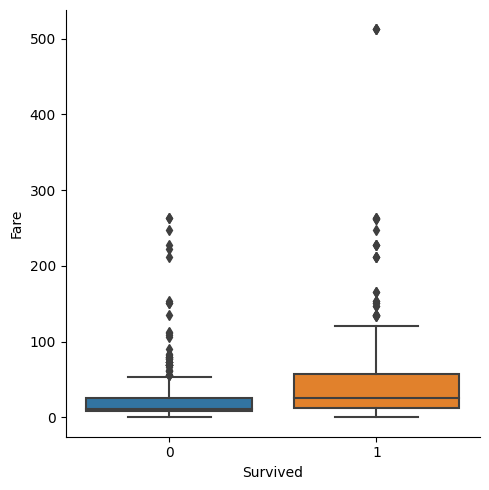

In [24]:
sns.catplot(
    data = train_df,
    x = 'Survived',
    y = 'Fare',
    kind = 'box'
)

Survivors tended to pay more money, this is similar to having a higher class (Pclass)

In [25]:
# Ticket number is dropped
train_df.drop('Ticket', axis = 1, inplace = True)

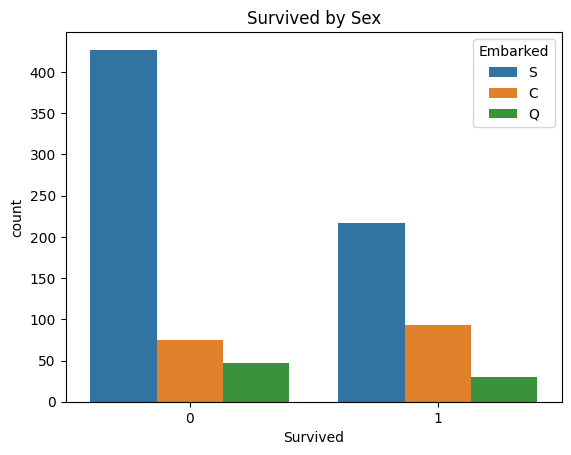

In [26]:
sns.countplot(
    data=train_df, 
    x="Survived", 
    hue="Embarked"
)
plt.title('Survived by Sex')
plt.show()

---
ML Models

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [28]:
# Columns accordingly to the imputation required
median_cols = ['Age', 'Fare'] # Columns to impute the median
mode_cols = ['Embarked'] # Columns to impute the mode
cat_cols = ['Sex', 'Embarked']
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

target_col = ['Survived']

# Median imputation
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])


cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

Preparing the training data set and test data set

In [29]:
X_train = train_df[cat_cols + num_cols]
y_train = train_df[target_col]

X_test = train_df[cat_cols + num_cols]
y_test = train_df[target_col]

In [30]:
# Hyper parameter search for tuning of the model
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt']
}

# Random search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenar
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Pclass',
                                                                                'Age',
                                                                                'SibSp',
                                                                                'Parch',
                                                                                'Fare']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Sex',
                                                                                'Embarked'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 5, 10,
                                                                  20],
                                        'classifier__max_features': ['sqrt'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [31]:
print(f"Best hyper-parameters: {random_search.best_params_}")


Best hyper-parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10}


In [32]:
model = RandomForestClassifier(
    random_state = 42,
    n_estimators = 300,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    max_depth = 10
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=42))])

Predictions of the model with the best hyperparameters found

In [33]:
predictions = pipeline.predict(X_test)

In [34]:
# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9394

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       549
           1       0.96      0.88      0.92       342

    accuracy                           0.94       891
   macro avg       0.94      0.93      0.93       891
weighted avg       0.94      0.94      0.94       891



Confusion Matrix

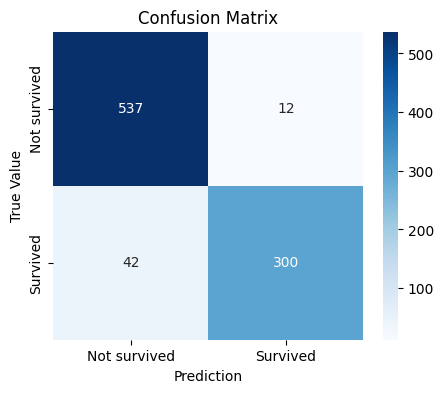

In [35]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not survived', 'Survived'], yticklabels=['Not survived', 'Survived'])
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.title("Confusion Matrix")
plt.show()